<a href="https://colab.research.google.com/github/Sreelakshmim6/CE888/blob/main/Lab_3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder


In [106]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [107]:
df_original=df.copy()
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [108]:
# convert a string variable to a categorical one
df[["y"]] = df[["y"]].apply(LabelEncoder().fit_transform)
#df[["poutcome"]] = df[["poutcome"]].apply(LabelEncoder().fit_transform)
#df[["day_of_week"]] = df[["day_of_week"]].apply(LabelEncoder().fit_transform)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [110]:
#df['education']=df['education'].replace(['basic.4y','basic.6y','basic.9y'],['basic','basic','basic'])
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [111]:
dummy1=pd.get_dummies(df['job'])
dummy2=pd.get_dummies(df['marital'])
dummy3=pd.get_dummies(df['education'])
dummy4=pd.get_dummies(df['default'])
dummy5=pd.get_dummies(df['housing'])
dummy6=pd.get_dummies(df['loan'])
dummy7=pd.get_dummies(df['contact'])
dummy8=pd.get_dummies(df['month'])
dummy9=pd.get_dummies(df['day_of_week'])
dummy10=pd.get_dummies(df['poutcome'])

#combine dummy data with main dataframe
master=pd.concat([df,dummy1,dummy2,dummy3,dummy4,dummy5,dummy6,dummy7,dummy8,dummy9,dummy10],axis=1)


In [120]:
len(master.columns)

74

In [113]:
x=master.drop(['job', 'marital', 'education', 'default', 'housing', 'loan','month','duration','contact','day_of_week','poutcome','y'],axis=1)
x.dtypes

age               int64
campaign          int64
pdays             int64
previous          int64
emp.var.rate    float64
                 ...   
tue               uint8
wed               uint8
failure           uint8
nonexistent       uint8
success           uint8
Length: 62, dtype: object

In [115]:
y=master.y

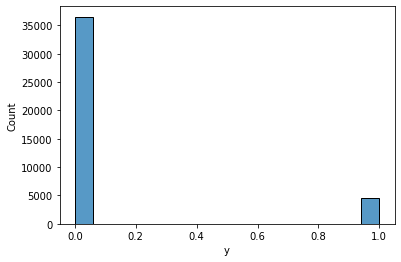

In [116]:
sns_plot = sns.histplot(y, kde=False)


In [117]:
z=list(y)
print("Count of yes :",z.count(1),"-",z.count(1)*100/len(y),"%","\nCount of no :",z.count(0),"-",z.count(0)*100/len(y),"%")


Count of yes : 4640 - 11.26541711178013 % 
Count of no : 36548 - 88.73458288821988 %


In [121]:
#split the data into training and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,stratify=y,test_size=0.2)


In [122]:
#10-fold stratified cross-validation on the training set using a random forest classifier with 100 trees and depth=3.

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=3)


# Create StratifiedKFold object
from sklearn.model_selection import StratifiedKFold 

skf = StratifiedKFold(n_splits=10,random_state=50) 
print(skf.split(x, y))
strtacc = [] 
   
for train_index, test_index in skf.split(x, y):
  x_train_fold, x_test_fold = x.take(list(train_index),axis=0), x.take(list(test_index),axis=0)
  y_train_fold, y_test_fold = y.take(list(train_index),axis=0), y.take(list(test_index),axis=0)
  clf.fit(x_train_fold, y_train_fold) 
  strtacc.append(clf.score(x_test_fold, y_test_fold)) 
   


In [138]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Perform 10-fold cross validation
scores = cross_val_score(dummy_clf, x_train , y_train, cv=10)
print ('Cross-validated scores:', scores)

predictions = cross_val_predict(dummy_clf, x_test, y_test, cv=10)


Cross-validated scores: [0.79453718 0.79757208 0.80212443 0.80242792 0.80789074 0.79787557
 0.79514416 0.79605463 0.8        0.80030349]


In [30]:
sorted(sklearn.metrics.SCORERS.keys()) 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [139]:
sklearn.metrics.f1_score(y_test,predictions)

0.12802582033351265

In [66]:
acc(y_test,predictions),sklearn.metrics.precision_score(y_test,predictions),sklearn.metrics.recall_score(y_test,predictions)

(0.898761835396941, 0.7098214285714286, 0.1713362068965517)

In [137]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(x_train, y_train)
print("Dummy ACC: %.2f" % acc(y_test, dummy_clf.predict(x_test)))

Dummy ACC: 0.79


In [67]:
from sklearn.model_selection import GridSearchCV
#n_estimators=list(range(100, 200))
n_estimators=[100,125,150,200]
#max_depth=list(range(10, 100))
max_depth = [2,4,6,8,10,12,None]

param_grid = {'n_estimators':n_estimators, 'max_features':['auto'],'max_depth':max_depth, 'criterion':['gini','entropy']}

# instantiate the grid
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, scoring='accuracy',n_jobs=10)

# fit the grid with data
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_

In [68]:
print(grid.best_score_)

print(grid.best_params_)

print(grid.best_estimator_)

0.901092564491654
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 125}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [69]:
clf = RandomForestClassifier(n_estimators=125, max_depth=12,criterion='entropy')
scores = cross_val_score(clf, x_train , y_train, cv=10)
print ('Cross-validated scores:', scores)

predictions = cross_val_predict(clf, x_test, y_test, cv=10)
acc(y_test,predictions),sklearn.metrics.precision_score(y_test,predictions),sklearn.metrics.recall_score(y_test,predictions)

Cross-validated scores: [0.90227618 0.90227618 0.89650986 0.90045524 0.89499241 0.90227618
 0.91107739 0.89863429 0.90075873 0.89650986]


(0.8994901675163874, 0.6275510204081632, 0.2650862068965517)

In [123]:
clf = RandomForestClassifier(n_estimators=250, max_depth=6)
scores = cross_val_score(clf, x_train , y_train, cv=10)
print ('Cross-validated scores:', scores)

predictions = cross_val_predict(clf, x_test, y_test, cv=10)


Cross-validated scores: [0.89590288 0.90227618 0.89468892 0.90045524 0.89468892 0.90257967
 0.90864947 0.89681335 0.89893778 0.89772382]


In [131]:
clf = RandomForestClassifier(n_estimators=750, max_depth=6,random_state=60)
scores = cross_val_score(clf, x_train , y_train, cv=10)
print ('Cross-validated scores:', scores)

predictions = cross_val_predict(clf, x_test, y_test, cv=10)


Cross-validated scores: [0.89590288 0.90227618 0.89438543 0.90015175 0.89438543 0.90318665
 0.91016692 0.89742033 0.89893778 0.89772382]


In [133]:
sklearn.metrics.f1_score(y_test,predictions)

0.3031329381879763

In [82]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [134]:
x.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown', 'divorced', 'married', 'single', 'unknown', 'basic.4y',
       'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown', 'no', 'unknown',
       'yes', 'no', 'unknown', 'yes', 'no', 'unknown', 'yes', 'cellular',
       'telephone', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed', 'failure',
       'nonexistent', 'success'],
      dtype='object')

[ 8  7  2 61  4  6  5  3  0 60 49 59 52 50 42 43 44 53 48  1 33 55 34 17
 10 14 31 45 56 23 46 57 51 47 58 27 54 22 28 18 30 36 38  9 39 41 16 32
 25 21 15 20 13 19 26 11 37 40 12 24 29 35]
Feature ranking:
1. nr.employed (0.187520)
2. euribor3m (0.146777)
3. pdays (0.114164)
4. success (0.099274)
5. emp.var.rate (0.085325)
6. cons.conf.idx (0.075486)
7. cons.price.idx (0.059134)
8. previous (0.027865)
9. age (0.025772)
10. nonexistent (0.019180)
11. mar (0.017644)
12. failure (0.015765)
13. oct (0.015425)
14. may (0.013593)
15. cellular (0.012608)
16. telephone (0.011195)
17. apr (0.007116)
18. sep (0.005444)
19. jun (0.004910)
20. campaign (0.004351)
21. no (0.003925)
22. mon (0.003591)
23. unknown (0.003377)
24. student (0.003221)
25. blue-collar (0.002988)
26. retired (0.002521)
27. university.degree (0.001995)
28. aug (0.001604)
29. thu (0.001560)
30. single (0.001560)
31. dec (0.001473)
32. tue (0.001369)
33. nov (0.001293)
34. jul (0.001291)
35. wed (0.001256)
36. basic.9y (0.00

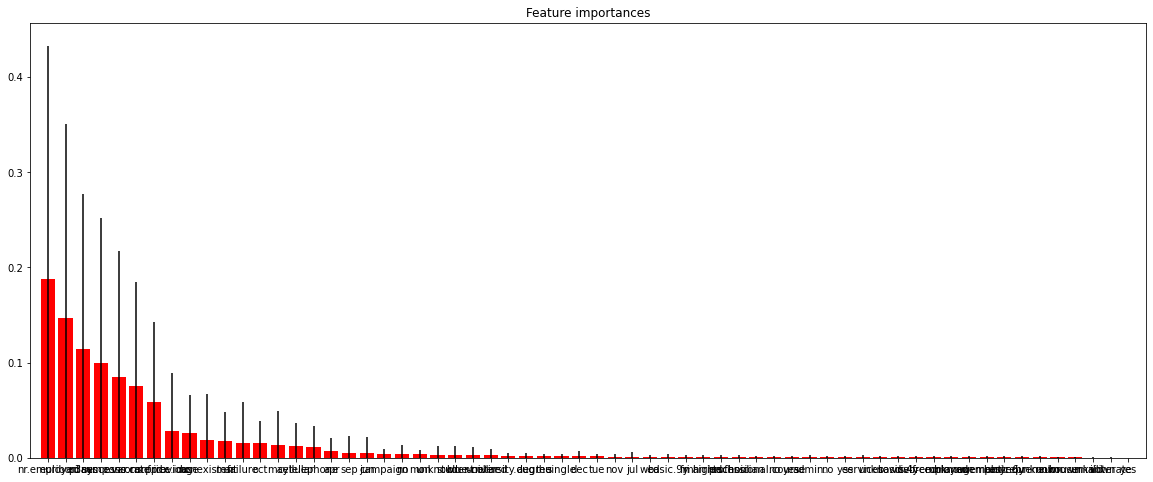

In [135]:
features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown', 'divorced', 'married', 'single', 'unknown', 'basic.4y',
       'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown', 'no', 'unknown',
       'yes', 'no', 'unknown', 'yes', 'no', 'unknown', 'yes', 'cellular',
       'telephone', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep', 'fri', 'mon', 'thu', 'tue', 'wed', 'failure',
       'nonexistent', 'success']

clf.fit(x_train, y_train)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), np.array(features)[indices])
plt.xlim([-1, x.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(20,8)
